#  Karlo Kegljevic analiza haljina

## 1. Kontrola kvalitete podataka

### Prepoznavanje nedostajucih vrijednosti

In [1]:
import pandas as pd
dresses = pd.read_csv("./dataset/Attribute_DataSet.csv")
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,859922576,cute,Average,4.6,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN,0
494,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0


### Rekodiranje nedostajucih vrijednosti npr .null -> "missing"

Kao sto mozemo vidjeti imamo jako puno redova koje u sebi imaju NaN.
Iz tablice iznad takoder vidimo da je zapravo vecina NaN vrijednosti "dekoracija", 
mozemo izmijeniti dekoraciju iz NaN u "no_decoration" radi lakse analize


In [2]:
dresses["Decoration"] = dresses["Decoration"].fillna("no_decoration")
# ponovnim pokretanjem naredbe mozemo vidjeti manji broj nedostajucih redova s nan vrijednostima
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,no_decoration,print,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,NaN,no_decoration,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,no_decoration,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,964917582,Casual,Average,5.0,L,Summer,o-neck,sleevless,natural,cotton,NaN,no_decoration,NaN,1
492,859922576,cute,Average,4.6,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,no_decoration,NaN,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,no_decoration,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,no_decoration,NaN,0


ponovnim pogledom na tablicu iznac mozemo primjetiti da su sada dominantni FabricType i PatternType u NaN
 promijeniti u "missing"

In [3]:
dresses["FabricType"]  = dresses["FabricType"].fillna("missing")
dresses["Pattern Type"] = dresses["Pattern Type"].fillna("missing")

# nakon rekodiranja fabrictype-a i patterntype-a nasa tablica sada ima jos manji broj NaN vrijednosti
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,missing,no_decoration,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,missing,no_decoration,solid,0
11,898481530,Flare,Average,0.0,free,Spring,v-neck,short,NaN,nylon,missing,no_decoration,animal,0
12,957723897,sexy,Low,4.7,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Average,4.8,M,Summer,o-neck,halfsleeve,NaN,NaN,missing,no_decoration,missing,0
470,1124754999,Sexy,Average,0.0,S,Summer,v-neck,sleevless,NaN,NaN,missing,no_decoration,missing,1
471,832949213,Casual,Low,4.4,free,Summer,o-neck,sleevless,NaN,NaN,missing,no_decoration,animal,0
473,929898500,work,Average,4.8,M,winter,turndowncollor,full,natural,NaN,missing,no_decoration,solid,0


Iz tablice sada mozemo vidjeti da su dominirajuci column-i waiseline i Material
Material mozemo staviti "missing" a waiseline idemo provjeriti koje su sve vrijednosti osim NaN

In [4]:
dresses["Material"] = dresses["Material"].fillna("missing")

In [5]:
waiseline = dresses["waiseline"]
waiseline_uniq = waiseline.drop_duplicates()
waiseline_uniq

0        empire
1       natural
6           NaN
283    princess
423     dropped
Name: waiseline, dtype: object

Mozemo vidjeti da postoje empire, natural, princess, dropped i NaN u nasoj kolekciji.
Istrazivanjem tipova haljina sam dosao do zakljucka da ovu NaN vrijednost mozemo takoder zamijeniti s missing, nije slucaj kao kod dekoracija gdje je haljina ili imala naziv dekoracije ili NaN(u slucaju da nema dekoraciju)

In [6]:
dresses["waiseline"] = dresses["waiseline"].fillna("missing")
# nakon ciscenja i ovin NaN vrijednosti idemo provijeriti ima li jos NaN vrijednosti u nasoj kolekciji
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
186,929797706,Casual,Low,0.0,free,NaN,o-neck,full,natural,cotton,missing,no_decoration,patchwork,0
262,662727740,party,NaN,4.8,free,Winter,o-neck,sleevless,empire,missing,missing,embroidary,missing,1
263,1090993173,party,NaN,4.5,L,Summer,NaN,full,missing,missing,missing,no_decoration,missing,1
270,751364623,party,Average,4.8,L,NaN,Sweetheart,sleevless,empire,missing,missing,pleat,missing,1
329,858212832,cute,Average,4.3,M,Summer,NaN,NaN,natural,cotton,chiffon,no_decoration,solid,0
384,855418066,Casual,Low,4.7,L,Summer,NaN,sleevless,missing,cotton,missing,no_decoration,solid,1
441,1055149353,Sexy,Low,0.0,free,winter,v-neck,NaN,dropped,cotton,missing,lace,missing,1


Sada postoji samo 7 redova koje u sebi imaju NaN vrijednosti.
Idemo provjeriti Season postoji li universal, jer haljine mogu biti za godisnja doba ili univerzalne koje pasu na bilo koje godisnje doba

In [7]:
season = dresses["Season"]
season_uniq = season.drop_duplicates()
season_uniq

0      Summer
2      Automn
3      Spring
12     Winter
16     spring
147    winter
186       NaN
250    summer
439    Autumn
Name: Season, dtype: object

Ovom tablicom mozemo vidjeti da nemamo univerzalnu haljinu, stoga NaN vrijednosti zamijenjujemo s universal
Takoder mozemo zamijetiti vrlo bitnu stvar: u kolekciji postoji summer/Summer, Winter/winter, Spring/spring i imamo Automn/Autumn, pravilno se pise Autumn pa cemo zamijeniti Automn a sto se tice velikih slova na pocetku, staviti cemo sve na velika slova

In [8]:
dresses["Season"] = dresses["Season"].fillna("universal")
dresses["Season"] = dresses["Season"].replace("Automn","Autumn")
dresses["Season"] = dresses["Season"].replace("spring","Spring")
dresses["Season"] = dresses["Season"].replace("winter","Winter")
dresses["Season"] = dresses["Season"].replace("summer","Summer")

# Provjera jesmo li dobro replace-ali
season = dresses["Season"]
season_uniq = season.drop_duplicates()
season_uniq

0         Summer
2         Autumn
3         Spring
12        Winter
186    universal
Name: Season, dtype: object

Dobili smo ocekivani output, idemo provjetiti jesmo li sada ocistili gotovo sve NaN-ove iz kolekcije

In [9]:
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
262,662727740,party,NaN,4.8,free,Winter,o-neck,sleevless,empire,missing,missing,embroidary,missing,1
263,1090993173,party,NaN,4.5,L,Summer,NaN,full,missing,missing,missing,no_decoration,missing,1
329,858212832,cute,Average,4.3,M,Summer,NaN,NaN,natural,cotton,chiffon,no_decoration,solid,0
384,855418066,Casual,Low,4.7,L,Summer,NaN,sleevless,missing,cotton,missing,no_decoration,solid,1
441,1055149353,Sexy,Low,0.0,free,Winter,v-neck,NaN,dropped,cotton,missing,lace,missing,1


Ostalo nam je jos samo 5 haljina, od kojih 4 nemaju fabricType, 3 ih nema patternType, 2 nemaju materijal, 2 nemaju cijenu itd.
Stoga cu droppati tih 5 uzoraka jer smatram da nisu bitni za daljnju analizu, iz ovih redaka nebi dobio znatno drugacije rezultate a uvelike ce mi olaksati analizu ostalih podataka

In [10]:
dresses = dresses.dropna()
dresses[dresses.isnull().any(axis=1)]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation


Ukoliko je iznad prazna tablica mozemo zakljuciti da smo ocistili sve NaN vrijednosti iz naseg dataseta

Primjetio sam da postoji low i Low, te high i High, Average i medium, napravit ćemo isto kao i za godisnja doba sve low pretvoriti u Low, sve high pretvoriti u High i sve average pretvoritit u medium. Također postoji s i small u size pa cu sve s pretvoriti u small. Primjetio sam da postoji i sleevless/sleeveless, budući da se pravilno piše sleeveless to ćemo također izmijeniti.
U Style postoji Sexy i sexy, mijenjati ćemo sexy u Sexy.
U NeckLine postoji Sweetheart i sweetheart, mijenjati ćemo Sweetheart u sweetheart


In [11]:
dresses['Price'] = dresses['Price'].replace('high', 'High')
dresses['Price'] = dresses['Price'].replace('low', 'Low')
dresses['Price'] = dresses['Price'].replace('Average', 'Medium')
dresses['Size'] = dresses['Size'].replace('s', 'small')
dresses['Size'] = dresses['Size'].replace('S', 'small')
dresses['Style'] = dresses['Style'].replace('sexy', 'Sexy')
dresses['NeckLine'] = dresses['NeckLine'].replace('Sweetheart', 'sweetheart')
dresses['Rating'] = dresses['Rating'].replace('unrated', 0.0)
dresses['SleeveLength'] = dresses['SleeveLength'].replace('sleevless', 'sleeveless')
dresses['SleeveLength'] = dresses['SleeveLength'].replace('sleeevless', 'sleeveless')
dresses['SleeveLength'] = dresses['SleeveLength'].replace('sleveless', 'sleeveless')
dresses['SleeveLength'] = dresses['SleeveLength'].replace('half', 'halfsleeve')


Kako bi lakše vidjeli matrice, grafove i ostale 'prikaze' pomoću kojih ćemo lakše primjetiti korelacije napraviti ću novi dataframe u kojem će svi stringovi biti zamjenjeni s brojevima. 

Napomena: preskacemo Rating i Recommendation jer su oni vec brojevi

In [12]:
n_dresses = dresses.copy()
del n_dresses['Dress_ID']
for c in n_dresses.columns:
    if c in ["Rating", "Recommendation"]: continue
    tmp = n_dresses[c]
    tmp_uniq = tmp.drop_duplicates()
    i = 1
    print(f"Column: {c}")
    for u in tmp_uniq:
        print(f"{u} -> {i}")
        n_dresses[c] = n_dresses[c].replace(u,i)
        i+=1
    print("===================")   


Column: Style
Sexy -> 1
Casual -> 2
vintage -> 3
Brief -> 4
cute -> 5
bohemian -> 6
Novelty -> 7
Flare -> 8
party -> 9
work -> 10
OL -> 11
fashion -> 12
Column: Price
Low -> 1
High -> 2
Medium -> 3
very-high -> 4
Column: Size
M -> 1
L -> 2
XL -> 3
free -> 4
small -> 5
Column: Season
Summer -> 1
Autumn -> 2
Spring -> 3
Winter -> 4
universal -> 5
Column: NeckLine
o-neck -> 1
v-neck -> 2
boat-neck -> 3
peterpan-collor -> 4
ruffled -> 5
turndowncollor -> 6
slash-neck -> 7
mandarin-collor -> 8
open -> 9
sqare-collor -> 10
sweetheart -> 11
Scoop -> 12
halter -> 13
backless -> 14
bowneck -> 15
Column: SleeveLength
sleeveless -> 1
Petal -> 2
full -> 3
butterfly -> 4
short -> 5
threequarter -> 6
halfsleeve -> 7
cap-sleeves -> 8
turndowncollor -> 9
threequater -> 10
capsleeves -> 11
urndowncollor -> 12
thressqatar -> 13
Column: waiseline
empire -> 1
natural -> 2
missing -> 3
princess -> 4
dropped -> 5
Column: Material
missing -> 1
microfiber -> 2
polyster -> 3
silk -> 4
chiffonfabric -> 5
cotton

Nakon priprema podataka vrijeme je da se upoznamo s podacima uz pomoć grafova i matrica.
Trebamo zapamtiti da trenutno postoje 2 dataframea, dresses i n_dresses, n_dresses cemo koristiti kod nekih matrica jer su svi stringovi zamijenjeni s brojevima dok je su u dresses podaci ostali u stringovima kao i u originalnom setu(jedino su napravljene one izmjene gdje je npr spojen high i High, Medium i M..)

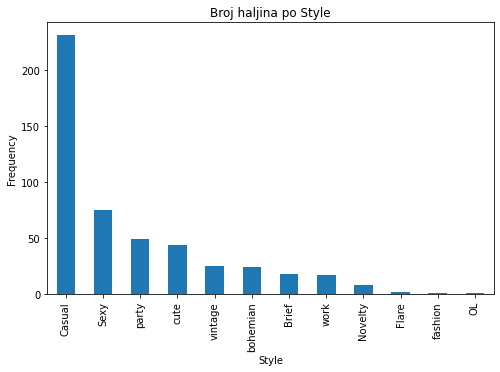

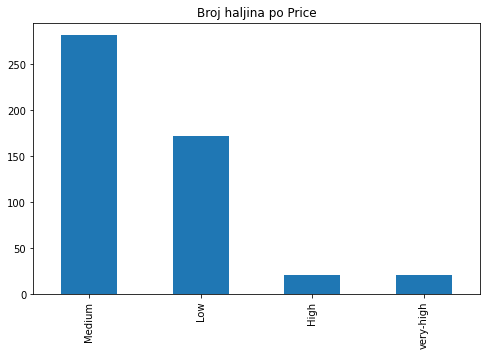

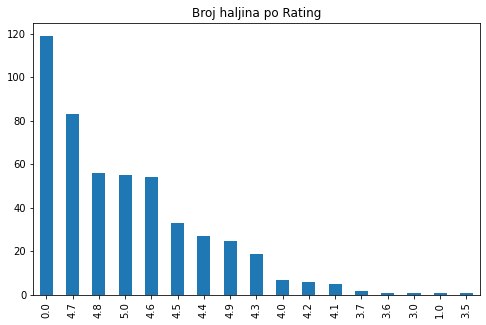

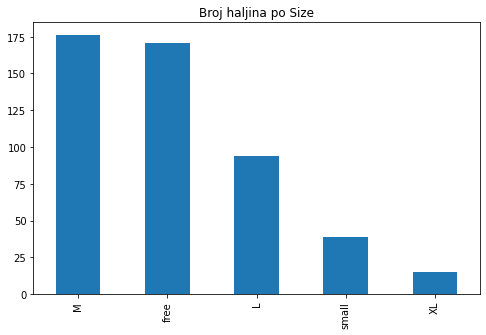

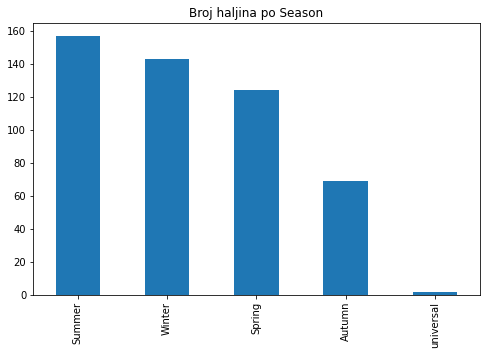

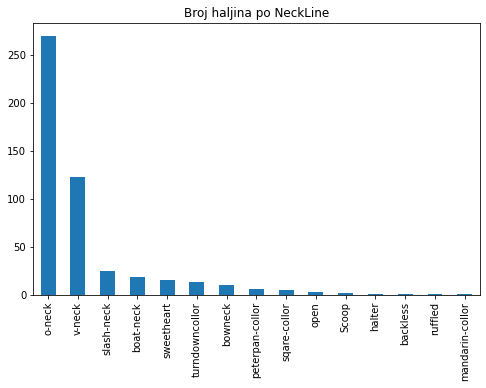

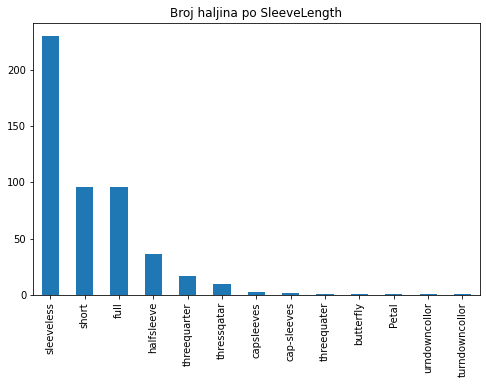

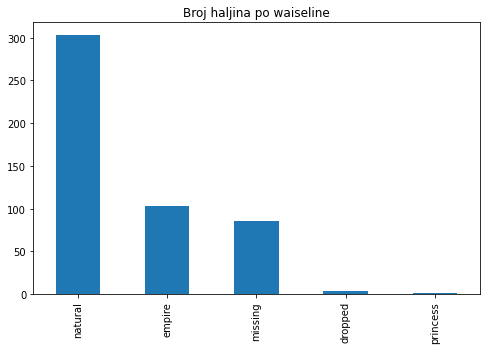

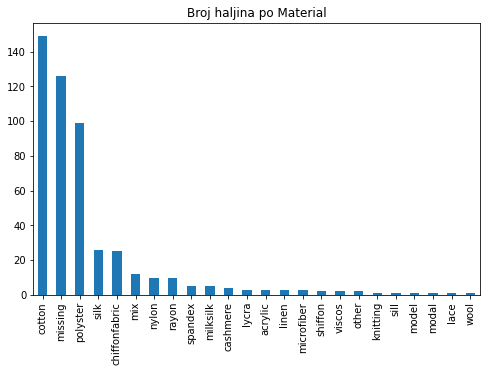

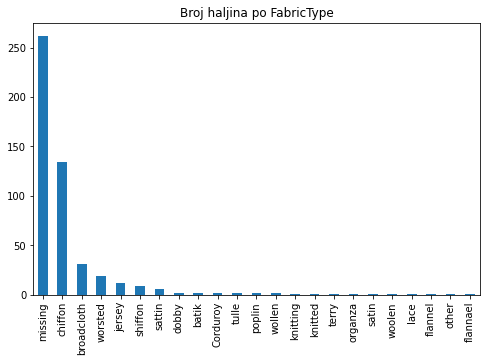

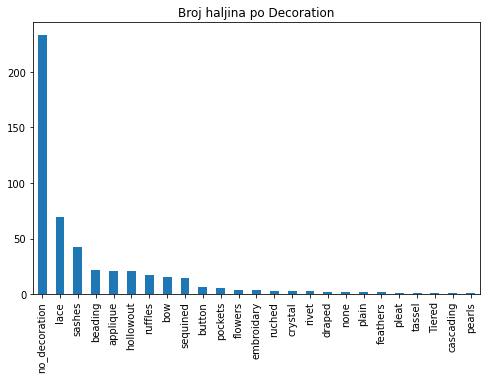

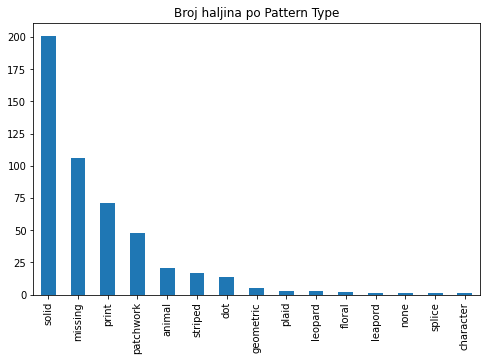

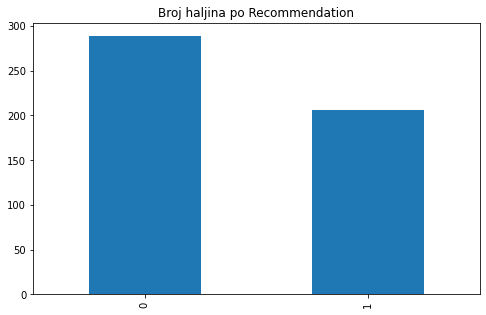

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import DataFrame


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

def draw_column_freq_plot(c,name):
    c.value_counts().plot(kind='bar', figsize=(8,5), title="Broj haljina po " + name)
    ax.set_xlabel(name)
    ax.set_ylabel("Frequency")
    plt.show()
    
for c in dresses.columns[1:]:  # preskacemo dress_ID
    draw_column_freq_plot(dresses[c],c)
    

Kako bi imali još bolji uvid u naše podatke napraviti ćemo grafove koje prikazuju slično kao ovi prošli no frekvenciju ćemo razdvojiti i po recommendationu

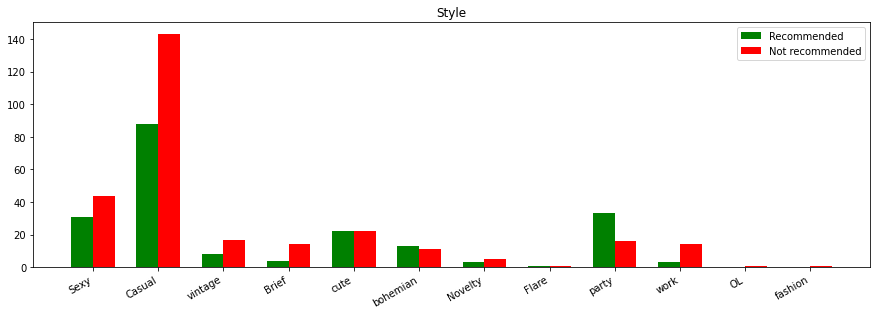

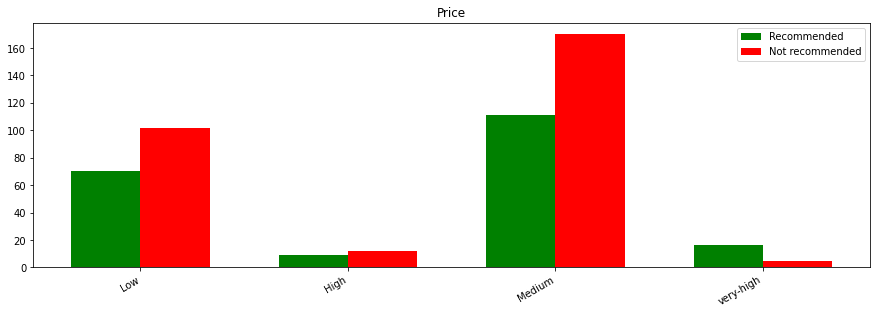

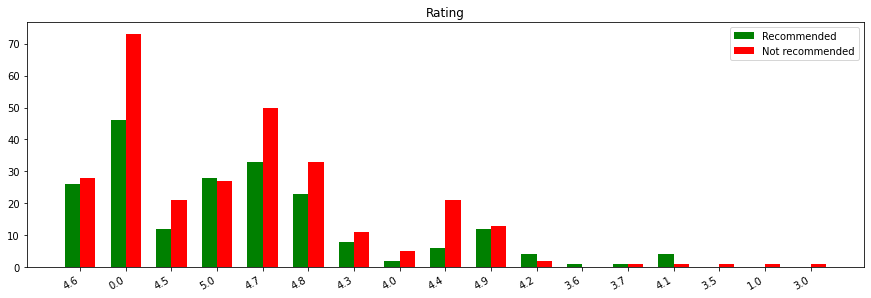

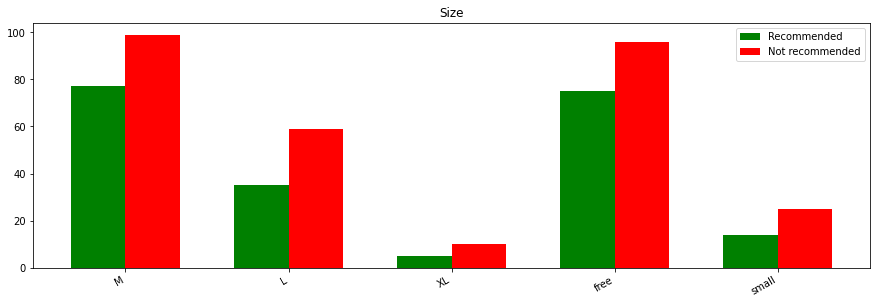

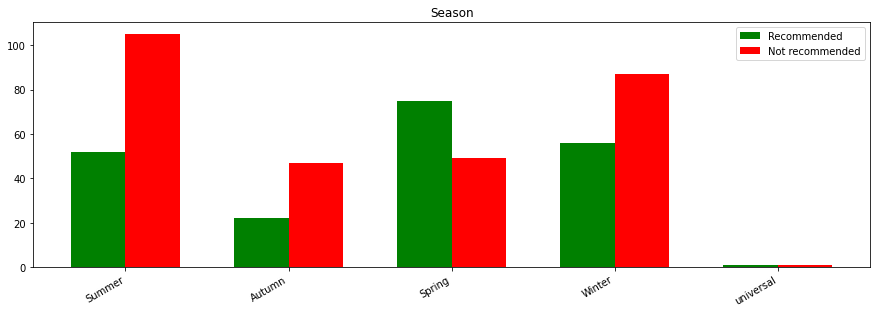

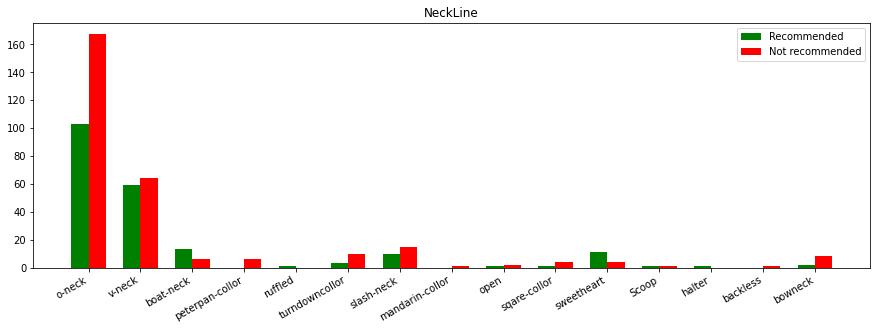

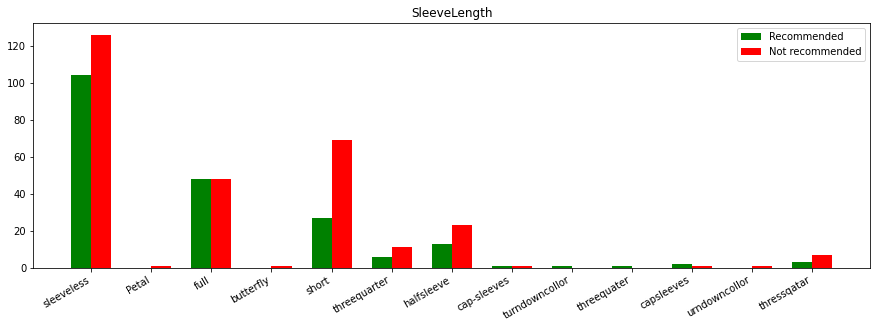

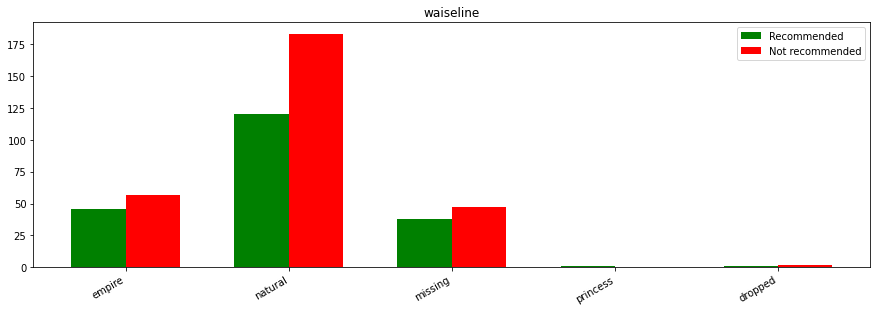

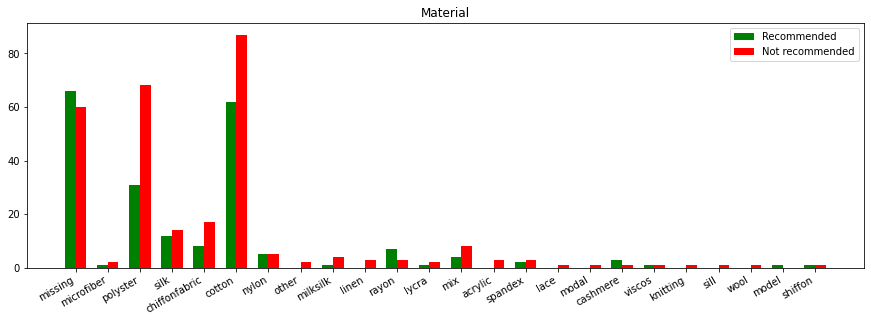

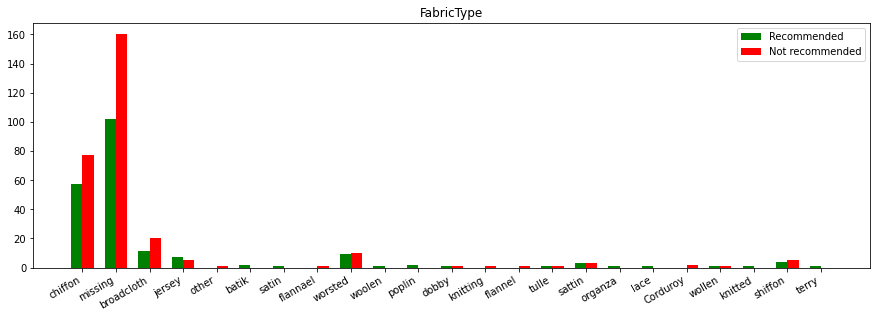

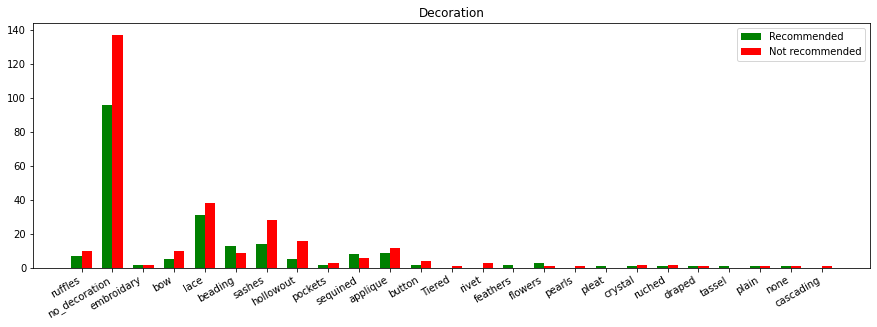

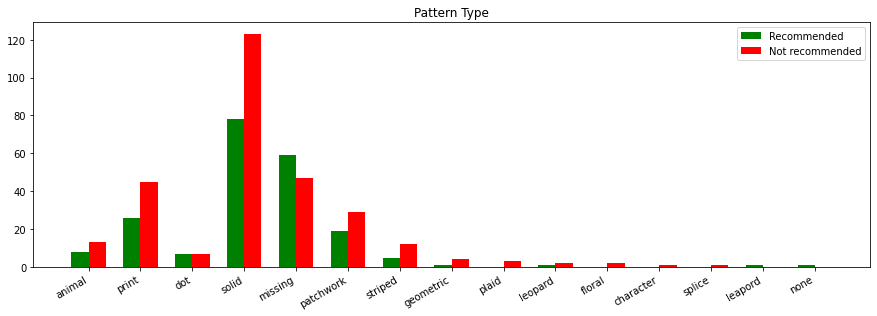

In [14]:
import numpy as np

for c in dresses.columns[1:-1]:  # preskacemo dress_ID i recommendation
    uniq = dresses[c].drop_duplicates()
    n_rec = []
    n_norec = []
    
    # get 2 bar values per each uniq string
    for u in uniq:
        n_rec.append(len(dresses[(dresses['Recommendation']==1) & (dresses[c]==u)]))
        n_norec.append(len(dresses[(dresses['Recommendation']==0) & (dresses[c]==u)]))
    
    indices = range(len(n_rec))
    # Calculate optimal width
    width = np.min(np.diff(indices))/3

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    re = ax.bar(indices,n_rec,width,color='g',label='Recommended')
    unre = ax.bar(indices+width,n_norec,width,color='r',label='Not recommended')
    ax.legend((re[0],unre[0]),("Recommended","Not recommended"))
    ax.set_xticks(indices+width/2)
    fig.autofmt_xdate()
    ax.axes.set_xticklabels(uniq)
    ax.set_title(c)
    
    plt.show()
    

Ovim grafovima došli smo do sljedećih zaključaka:

* Style: vidimo da je Casual najčešći stil haljine, dok je najviše preporučeni stil party 
* Price: srednja i niska cijena uvelike vode po broju haljina, što je i za očekivati, 
* Rating: najčešće su unrated haljine što je i logično, također vidimo da haljine koje imaju 5.0 imaju najveću vjerojatnost da će biti recommendane (veći je broj recommendanih nego unrecommended na ukupan broj haljina ocjenjenih s 5.0)
* Size: ne vidi se previše informacija, očito je da je najviše M haljina budući da je to najčešća veličina haljine
* Season: ovdje vidimo zanimljivu stvar, najviše je recommendana haljina za proljeće  jer završava zimski period u kojem nisu mogli nositi haljine pa su željni nošenja haljina i veća je vjerojatnost da će kupiti haljinu tada, i zato se ovaj recommendation "izgradio" tako
* NeckLine: ne vidimo korisnih informacija iz grafa, jedino da je boat-neck vrlo poželjan za preporuku jer je puno veći broj recommendationa nego ne 
* SleeveLength: ovdje vidimo zanimljivu stvar da su kratki rukavi na haljinama ne preporučljivi jer je više nego duplo veći broj ne preporučenih nego preporučenih
* waiseline: ne vidimo korisnih informacija
* Material: ovdje vidimo da je jako veliki broj missing varijabli, ali također vidimo da je polyester ne preporučljiv tip materijala za haljine
* FabricType: ne vidimo korisnih informacija, jako je puno missing varijabli
* Decoration: veliki je broj haljina bez dekoracije što i ima smisla budući da to omogućava ljudima da naknadno završe svoju modnu kombinaciju i nakitom ili drugim modnim artiklima raznih boja
* Pattern Type: solid je najčešći uzorak haljine, također ima dosta veliki broj missing tipa uzorka

In [15]:
n_dresses.describe()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,3.543434,2.305051,3.527273,2.602020,2.523232,2.638384,3.167677,1.985859,4.866667,3.163636,4.981818,4.280808,0.416162
std,2.742238,0.996895,2.006942,1.455548,1.220177,3.125665,2.634666,0.665672,4.020494,4.242103,4.361414,1.814231,0.493420
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,3.700000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,0.000000
50%,2.000000,3.000000,4.600000,2.000000,3.000000,1.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000,0.000000
75%,5.000000,3.000000,4.800000,4.000000,4.000000,2.000000,5.000000,2.000000,6.000000,2.000000,7.000000,5.000000,1.000000
max,12.000000,4.000000,5.000000,5.000000,5.000000,15.000000,13.000000,5.000000,24.000000,23.000000,25.000000,15.000000,1.000000


Nakon grafova vrijeme je za heatmap i matrice

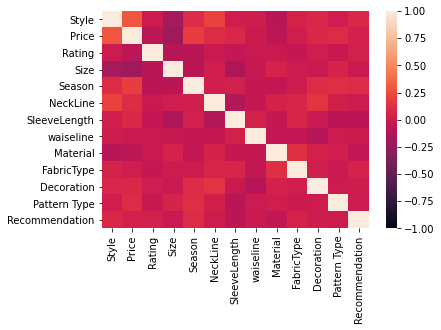

In [16]:
import seaborn as sns
corr = n_dresses.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1);

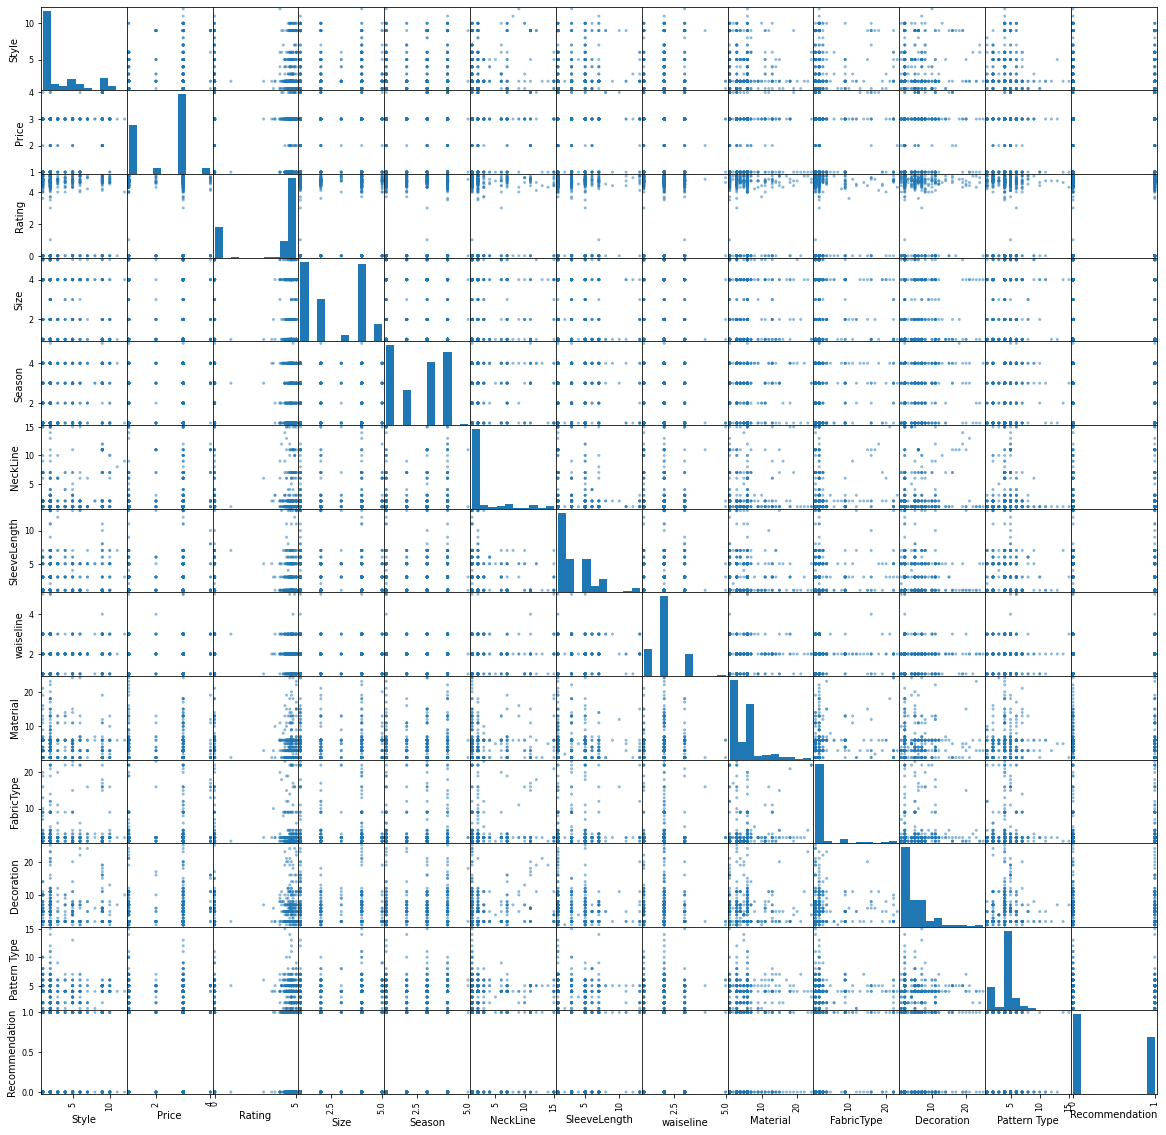

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(n_dresses, figsize=(20, 20));

### Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu

ciljna varijabla je Recommendation, nisam je morao redizajnirati jer je vec bila u binarnom obliku

### Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

koristiti cemo zscore iz scipy-a jer smo normalizirali podatke u 

In [21]:
from scipy.stats import zscore

n_dresses_z = n_dresses.apply(zscore)
n_dresses_z.head(5)


,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,-0.928441,-1.310439,0.535049,-1.101744,-1.249633,-0.524702,-0.823584,-1.482495,-0.962712,-0.510555,-0.913888,-1.810204,1.184446
1,-0.563407,-1.310439,-1.759314,-0.414022,-1.249633,-0.524702,-0.443646,0.021265,-0.713735,-0.274584,-0.913888,-1.810204,-0.844276
2,-0.198372,-0.306310,-1.759314,-0.414022,-0.429251,-0.524702,-0.063707,0.021265,-0.464758,-0.274584,-0.684373,-1.258448,-0.844276
3,0.166662,0.697819,0.535049,-0.414022,0.391132,-0.524702,-0.063707,0.021265,-0.215780,-0.510555,-0.454858,-1.258448,1.184446
4,0.531697,-1.310439,0.485172,-1.101744,-1.249633,-0.524702,0.316232,0.021265,0.033197,-0.510555,-0.225342,-0.706693,-0.844276


Style             0.091339
Price             0.041810
Rating            0.042073
Size             -0.011320
Season            0.101588
NeckLine          0.005897
SleeveLength     -0.084929
waiseline        -0.000535
Material         -0.047483
FabricType        0.062176
Decoration        0.014811
Pattern Type      0.004870
Recommendation    1.000000
Name: Recommendation, dtype: float64

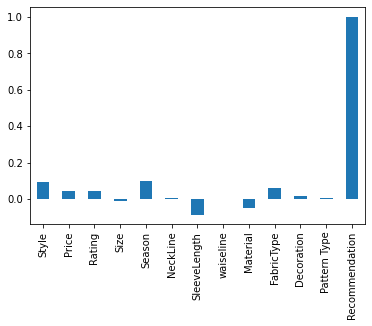

In [22]:
corrs_norm = n_dresses_z.corr()['Recommendation'][:]
corrs_norm.plot.bar();
corrs_norm

In [41]:

dresses_groups = n_dresses.copy()
for c in n_dresses.columns:
    dresses_groups[f"{c}-groups"] = pd.cut(dresses_groups[c], [-9999, -3, 3, 9999], labels=['<-3', '-3 to 3', '>3'])
    
# prikazati cemo samo grupirane kategorizirane razrede u style 
# no gornjim forom smo to napravili za svaki column
dresses_groups.groupby("Style-groups").head(3)

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,...,Size-groups,Season-groups,NeckLine-groups,SleeveLength-groups,waiseline-groups,Material-groups,FabricType-groups,Decoration-groups,Pattern Type-groups,Recommendation-groups
0,1,1,4.6,1,1,1,1,1,1,1,...,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3
1,2,1,0.0,2,1,1,2,2,2,2,...,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3
2,3,2,0.0,2,2,1,3,2,3,2,...,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3
3,4,3,4.6,2,3,1,3,2,4,1,...,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,>3,-3 to 3,-3 to 3,-3 to 3,-3 to 3
4,5,1,4.5,1,1,1,4,2,5,1,...,-3 to 3,-3 to 3,-3 to 3,>3,-3 to 3,>3,-3 to 3,>3,-3 to 3,-3 to 3
5,6,1,0.0,1,1,2,1,1,1,2,...,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3,-3 to 3


### Heatmap, grafovi, matrice, korleacije..

Pokazuju nam kako nema bas nekih jakih korelacija s ciljnom varijablom(Recommendation), ako vidimo ovaj plotbar 2 linije iznad, vidimo kako smo prikazali korelacije svakog columna s Recommendationom(ciljnom varijablom) i niti jedan column se ne istice, time zakljucujem da nema dovoljne korelacije niti jednog columna s Recommendationom.

Takoder jedna od stvari ne vezana za ciljnu varijablu, a mozda ce vam biti interesantna je ta da vidimo kako na Style utjecje NeckLine i Price, postoji jos par takvih korelacija(ne vezanih za ciljnu varijablu) ali sam Vam htio pokazati da znam prepoznati to iako nije povezano s ciljnom varijablom

## 3. IV, WoE izračuni

In [50]:
# https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb
# source

# import packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["Recommendation"] = "VAR"
    d3 = d3[['Recommendation','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["Recommendation"] = "VAR"
    d3 = d3[['Recommendation','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["Recommendation"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["Recommendation"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('Recommendation').IV.max()})
    iv = iv.reset_index()
    woe = pd.DataFrame({'WOE':iv_df.groupby('Recommendation').IV.max()})
  
    return(iv_df,iv, woe)


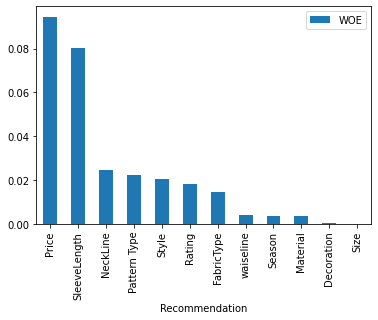

In [51]:
final_iv, IV, WOE = data_vars(n_dresses,n_dresses.Recommendation)
WOE.sort_values('WOE', ascending=False).plot(kind='bar');

In [52]:
IV.sort_values('IV')

,Recommendation,IV
8,Size,0.000037
0,Decoration,0.000299
2,Material,0.003541
7,Season,0.003751
11,waiseline,0.004081
1,FabricType,0.014374
6,Rating,0.018323
10,Style,0.020325
4,Pattern Type,0.022445
3,NeckLine,0.024444


### Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)

Veliki broj zakljucaka sam rekao vec u komentarima ispod grafova, no samim izracunom WoE i IV sam potvrdio svoje pretpostavke koje sam imao na temelju grafova, heatmapova i matrica. Price ima 0.09 IV i  sto je jako jako malo.

### Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili … )

Predlozio bih da ukoliko netko ide raditi haljinu da je stavi u prodaju u proljece, da ima boat-neck, da nema kratke rukave i da nije radena od polyestera.


Ovaj zakljucak je temeljen ovim podacima, naime do prije ovog projekta nisam niti znao da postoji toliko razlicitih haljina.

Ovime bi zavrsio ovu analizu.